In [1]:
import pandas as pd
import tensorflow as tf
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# Read the data from a csv file
data = pd.read_csv('house-prices/kc_house_data.csv')

In [3]:
data.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
id               21613 non-null int64
date             21613 non-null object
price            21613 non-null float64
bedrooms         21613 non-null int64
bathrooms        21613 non-null float64
sqft_living      21613 non-null int64
sqft_lot         21613 non-null int64
floors           21613 non-null float64
waterfront       21613 non-null int64
view             21613 non-null int64
condition        21613 non-null int64
grade            21613 non-null int64
sqft_above       21613 non-null int64
sqft_basement    21613 non-null int64
yr_built         21613 non-null int64
yr_renovated     21613 non-null int64
zipcode          21613 non-null int64
lat              21613 non-null float64
long             21613 non-null float64
sqft_living15    21613 non-null int64
sqft_lot15       21613 non-null int64
dtypes: float64(5), int64(15), object(1)
memory usage: 3.5+ MB


In [5]:
# We won't be using the data and id columns for our training set. 
# I may create another notebook in the future for predictions based on time series using RNN.
X = data.drop(['price','date','id'], axis=1)
y = data['price']

In [6]:
# Train/Test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=101)

In [68]:
# Scaling the features between 1-0
scaler = MinMaxScaler()

In [8]:
X_train = pd.DataFrame(scaler.fit_transform(X_train), columns=X_train.columns, index=X_train.index)

In [9]:
X_test = pd.DataFrame(scaler.transform(X_test), columns=X_test.columns, index=X_test.index)

In [10]:
X_train.columns

Index(['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long',
       'sqft_living15', 'sqft_lot15'],
      dtype='object')

In [11]:
# A shorter way can be used as feat_cols = [tf.feature_column.numeric_column('x', shape=[19])]
bedrooms = tf.feature_column.numeric_column('bedrooms')
bathrooms = tf.feature_column.numeric_column('bathrooms')
sqft_living = tf.feature_column.numeric_column('sqft_living')
sqft_lot = tf.feature_column.numeric_column('sqft_lot')
floors = tf.feature_column.numeric_column('floors')
view = tf.feature_column.numeric_column('view')
condition = tf.feature_column.numeric_column('condition')
grade = tf.feature_column.numeric_column('grade')
sqft_above = tf.feature_column.numeric_column('sqft_above')
sqft_basement = tf.feature_column.numeric_column('sqft_basement')
yr_built = tf.feature_column.numeric_column('yr_built')
yr_renovated = tf.feature_column.numeric_column('yr_renovated')
zipcode = tf.feature_column.numeric_column('zipcode')
lat = tf.feature_column.numeric_column('lat')
long = tf.feature_column.numeric_column('long')
sqft_living15 = tf.feature_column.numeric_column('sqft_living15')
sqft_lot15 = tf.feature_column.numeric_column('sqft_lot15')

In [12]:
feat_cols = [bedrooms,bathrooms,sqft_living,sqft_lot,floors,view,condition,grade,sqft_above,sqft_basement,
             yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15]

In [49]:
# Creating a DNN model with 19 layers
dnn_model = tf.estimator.DNNRegressor(hidden_units=[25,25,25,25,25,25,20,20,20,20,20,20,20,20,20,20,20,20,19],
                                      feature_columns=feat_cols)

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_log_step_count_steps': 100, '_task_id': 0, '_save_checkpoints_steps': None, '_is_chief': True, '_keep_checkpoint_max': 5, '_session_config': None, '_master': '', '_model_dir': '/var/folders/y0/f6x1qz191gxdq8fj4lpy82l00000gn/T/tmprtah2que', '_num_worker_replicas': 1, '_num_ps_replicas': 0, '_task_type': 'worker', '_save_checkpoints_secs': 600, '_tf_random_seed': None, '_keep_checkpoint_every_n_hours': 10000, '_service': None, '_save_summary_steps': 100, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x1a18354358>}


In [50]:
# Input function what will be fed into the input dictionary
input_fn = tf.estimator.inputs.pandas_input_fn(X_train,
                                          y=y_train, shuffle=True,batch_size=32,
                                          num_epochs=2000)

In [51]:
# Train the model
dnn_model.train(input_fn, steps=10000)

INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Saving checkpoints for 1 into /var/folders/y0/f6x1qz191gxdq8fj4lpy82l00000gn/T/tmprtah2que/model.ckpt.
INFO:tensorflow:loss = 6.40637e+12, step = 1
INFO:tensorflow:global_step/sec: 182.739
INFO:tensorflow:loss = 8.96897e+11, step = 101 (0.545 sec)
INFO:tensorflow:global_step/sec: 225.799
INFO:tensorflow:loss = 1.57596e+12, step = 201 (0.450 sec)
INFO:tensorflow:global_step/sec: 283.543
INFO:tensorflow:loss = 6.48099e+11, step = 301 (0.350 sec)
INFO:tensorflow:global_step/sec: 278.726
INFO:tensorflow:loss = 1.49061e+12, step = 401 (0.358 sec)
INFO:tensorflow:global_step/sec: 237.106
INFO:tensorflow:loss = 4.75115e+12, step = 501 (0.420 sec)
INFO:tensorflow:global_step/sec: 272.413
INFO:tensorflow:loss = 2.41989e+12, step = 601 (0.367 sec)
INFO:tensorflow:global_step/sec: 290.221
INFO:tensorflow:loss = 7.9485e+11, step = 701 (0.346 sec)
INFO:tensorflow:global_step/sec: 266.784
INFO:tensorflow:loss = 5.30478e+11, step = 801 (0.37

INFO:tensorflow:loss = 5.90126e+11, step = 8001 (0.386 sec)
INFO:tensorflow:global_step/sec: 236.596
INFO:tensorflow:loss = 2.37581e+12, step = 8101 (0.420 sec)
INFO:tensorflow:global_step/sec: 243.159
INFO:tensorflow:loss = 1.8507e+12, step = 8201 (0.410 sec)
INFO:tensorflow:global_step/sec: 255.359
INFO:tensorflow:loss = 5.81609e+11, step = 8301 (0.391 sec)
INFO:tensorflow:global_step/sec: 251.328
INFO:tensorflow:loss = 8.40485e+11, step = 8401 (0.401 sec)
INFO:tensorflow:global_step/sec: 242.428
INFO:tensorflow:loss = 8.59243e+11, step = 8501 (0.410 sec)
INFO:tensorflow:global_step/sec: 254.902
INFO:tensorflow:loss = 7.94873e+11, step = 8601 (0.393 sec)
INFO:tensorflow:global_step/sec: 303.881
INFO:tensorflow:loss = 7.18178e+11, step = 8701 (0.337 sec)
INFO:tensorflow:global_step/sec: 227.306
INFO:tensorflow:loss = 5.2545e+11, step = 8801 (0.431 sec)
INFO:tensorflow:global_step/sec: 278.966
INFO:tensorflow:loss = 7.14595e+11, step = 8901 (0.359 sec)
INFO:tensorflow:global_step/sec: 

In [52]:
# Input function for predictions
predict_input_func = tf.estimator.inputs.pandas_input_fn(X_test, batch_size=100, num_epochs=1, shuffle=False)

In [53]:
# Make predictions and cast them into a list
preds = list(dnn_model.predict(predict_input_func))

INFO:tensorflow:Restoring parameters from /var/folders/y0/f6x1qz191gxdq8fj4lpy82l00000gn/T/tmprtah2que/model.ckpt-10000


In [54]:
preds

[{'predictions': array([ 435419.0625], dtype=float32)},
 {'predictions': array([ 603191.625], dtype=float32)},
 {'predictions': array([ 491490.9375], dtype=float32)},
 {'predictions': array([ 304736.78125], dtype=float32)},
 {'predictions': array([ 265412.09375], dtype=float32)},
 {'predictions': array([ 459936.25], dtype=float32)},
 {'predictions': array([ 416103.65625], dtype=float32)},
 {'predictions': array([ 299299.65625], dtype=float32)},
 {'predictions': array([ 271858.625], dtype=float32)},
 {'predictions': array([ 546661.], dtype=float32)},
 {'predictions': array([ 492064.90625], dtype=float32)},
 {'predictions': array([ 857507.1875], dtype=float32)},
 {'predictions': array([ 514925.34375], dtype=float32)},
 {'predictions': array([ 510208.40625], dtype=float32)},
 {'predictions': array([ 612591.3125], dtype=float32)},
 {'predictions': array([ 271299.21875], dtype=float32)},
 {'predictions': array([ 626632.0625], dtype=float32)},
 {'predictions': array([ 505488.03125], dtype=fl

In [55]:
predictions = [p['predictions'][0] for p in preds]

In [56]:
# Evaluate the model using RMSE
from sklearn.metrics import mean_squared_error

In [57]:
mean_squared_error(y_test, predictions)**0.5

177938.92202934093

In [65]:
# Create a new dataframe for visualization purposes
final_df = pd.DataFrame(columns=['sqft_living', 'price', 'estimated_price'])
final_df['sqft_living'] = X_test['sqft_living']
final_df['price'] = pd.DataFrame(y_test)
final_df['estimated_price'] = predictions

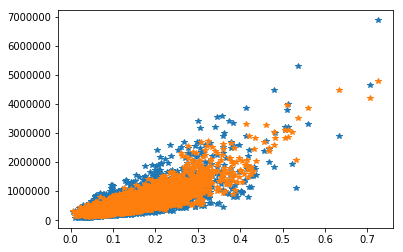

In [67]:
plt.plot(final_df.sqft_living, final_df.price, '*')
plt.plot(final_df.sqft_living,final_df.estimated_price, '*')